In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2761 entries, 2012-01-03 to 2022-12-20
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2761 non-null   float64
 1   (High, GOOG)    2761 non-null   float64
 2   (Low, GOOG)     2761 non-null   float64
 3   (Open, GOOG)    2761 non-null   float64
 4   (Volume, GOOG)  2761 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.4 KB


In [4]:
data.reset_index(inplace = True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131855,16.379533,16.126146,16.358437,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [6]:
ma_days_100 = data.Close.rolling(100).mean()
ma_days_100.tail(5)

Ticker,GOOG
2756,103.243735
2757,103.101845
2758,102.875259
2759,102.621770
2760,102.352637


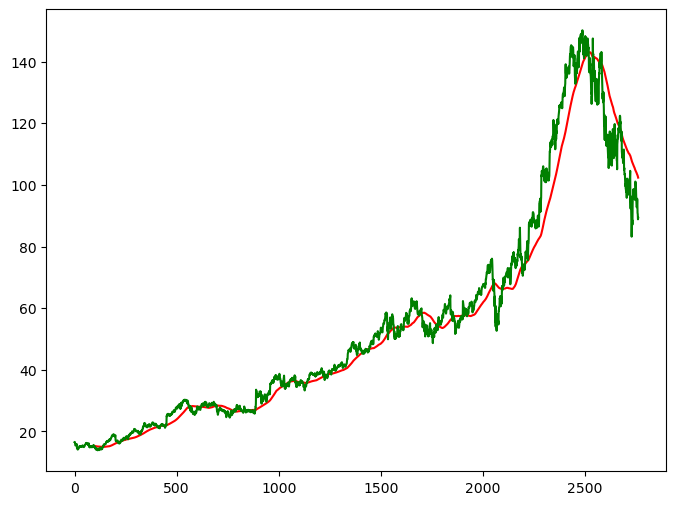

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_days_100,'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_days_200 = data.Close.rolling(200).mean()
ma_days_200.tail()

Ticker,GOOG
2756,112.009501
2757,111.792523
2758,111.576061
2759,111.361970
2760,111.178457


<function matplotlib.pyplot.show(close=None, block=None)>

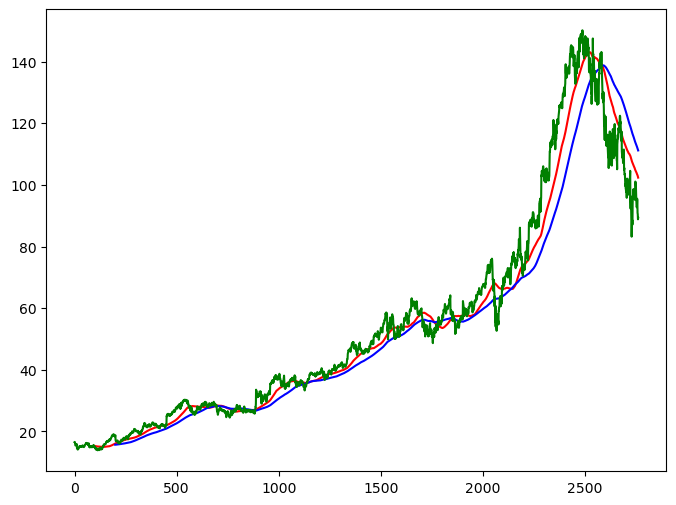

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_days_100, 'r')
plt.plot(ma_days_200, 'b')
plt.plot(data.Close, 'g')
plt.show

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [12]:
data['Close'].head()

Ticker,GOOG
0,16.513794
1,16.585020
2,16.354961
3,16.131855
4,15.447884


In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape

(2208, 1)

In [15]:
data_test.shape

(553, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
data_train_scale.shape

(2208, 1)

In [19]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    # print(f'x = {data_train_scale[i-100:i]}')
    y.append(data_train_scale[i,0])
    # print(f'y = {data_train_scale[i,0]}')

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation= 'relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation= 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [34]:
model.fit(x,y,epochs=50, batch_size= 32, verbose= 1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.0593
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0074
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0059
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0070
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0043
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0049
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0058
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0041
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0038
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0044
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0040
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0039
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0038
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0038
E

In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [67]:
from keras.models import load_model

model = load_model('stockPrediction.keras')

In [68]:
pass_100_days = data_train.tail(100)
base_days = 100

In [69]:
data_test = pd.concat([pass_100_days,data_test], ignore_index= True)

In [70]:
data_test_scale = scaler.fit_transform(data_test)

In [71]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    

x,y = np.array(x), np.array(y)

In [72]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [73]:
scale = 1/scaler.scale_

In [74]:
y_predict = y_predict*scale
y = y*scale

<function matplotlib.pyplot.show(close=None, block=None)>

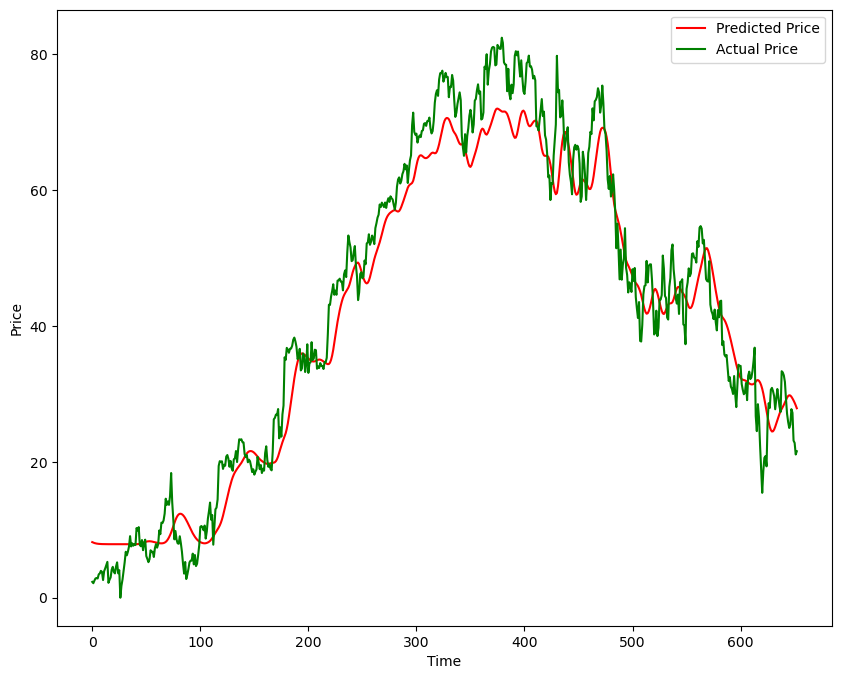

In [75]:
plt.figure(figsize= (10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show

In [76]:
# future predicition

temp = y

print(temp.shape)
# temp

z = []
future_days = 30
for i in range(base_days, len(temp)+future_days):
    # print(f'iter : {i}\n awal: {base_days}, akhir: {len(temp)+future_days}')
    temp = temp.reshape(-1,1)
    inter = [temp[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    # print(f"inter : {inter}\n")
    # print(f'pred : {pred}')
    temp = np.append(temp ,pred)
    z = np.append(z, pred)
    
    

(653,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━

In [86]:
# Konversi hasil prediksi ke skala asli
import plotly.graph_objects as go

z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1, 1))

fig = go.Figure()

# Tambahkan batang prediksi
fig.add_trace(go.Bar(
    x=list(range(1, future_days + 1)),
    y=z[-future_days:].flatten(),
    name='Prediksi 30 Hari Mendatang',
    marker=dict(
        color='rgb(26, 118, 255)',
        line=dict(color='rgb(8, 48, 107)', width=1.5)
    ),
    hovertemplate='Hari ke-%{x}<br>Harga: %{y:.2f}<extra></extra>'
))

# Tambahkan elemen visual untuk menonjolkan data
fig.update_layout(
    title=dict(
        text="Prediksi Harga Bitcoin 30 Hari Mendatang",
        font=dict(size=20),
        x=0.5
    ),
    xaxis=dict(
        title="Hari ke-",
        tickmode='linear',
        showgrid=True
    ),
    yaxis=dict(
        title="Harga (dalam skala asli)",
        tickformat=".2f",
        showgrid=True
    ),
    legend=dict(
        title="Legenda",
        orientation="h",
        x=0.5,
        xanchor="center",
        y=1.1
    ),
    template="plotly_white",
    hovermode="x unified",
    font=dict(
        size=12
    )
)

# Tampilkan grafik
fig.show()

In [78]:
# model.save("stockPrediction.keras")